In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset

df = pd.read_excel(r'C:\Users\USER\Downloads\iris_1.xls')

In [3]:
# Columns in dataset

df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [4]:
# First 5 rows

df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Information in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Shape of dataset

df.shape

(150, 5)

In [7]:
# Check for missing values

df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
# Drop missing values since there is only less number of missing values

df = df.dropna()

In [9]:
# check for duplicates

df.duplicated().sum()

3

In [10]:
# Drop duplicated values

df.drop_duplicates(inplace=True)

# Check and handle outliers

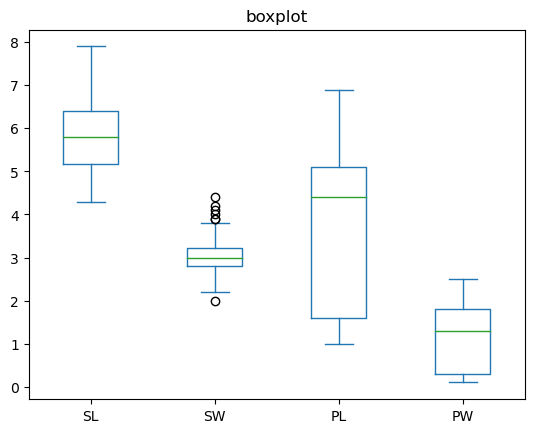

In [11]:
# Boxplot

df[['SL', 'SW','PL','PW']].plot(kind='box', title='boxplot')
plt.show()

From the boxplots, outliers are present in SW

In [12]:
# Handling outliers using Flooring And Capping Method:

Q1 = df['SW'].quantile(0.25)
Q3 = df['SW'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['SW']=np.where(df['SW']>upper_whisker,upper_whisker,np.where(df['SW']<lower_whisker,lower_whisker,df['SW']))

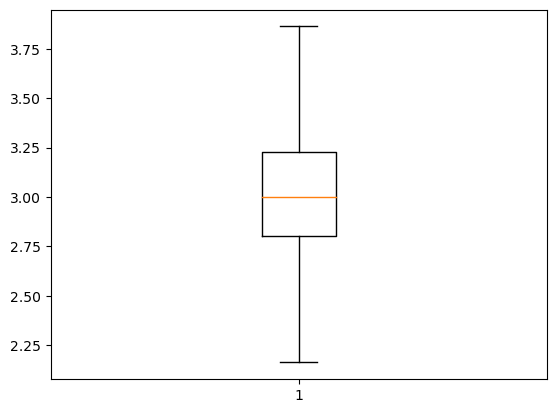

In [13]:
# Boxplot after Flooring And Capping Method:

plt.boxplot(df['SW'])
plt.show()

# Encoding

In [14]:
df['Classification'].value_counts()

Iris-versicolor    44
Iris-virginica     44
Iris-setosa        40
Name: Classification, dtype: int64

In [15]:
# Encoding the categorical data (One hot encoding)

from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
transformed_data = one_hot.fit_transform(df['Classification'].values.reshape(-1,1)).toarray()
one_hot.categories_

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

In [16]:
transformed_data = pd.DataFrame(transformed_data, columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
transformed_data.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


# MinMax Scaling : take classification column as target

In [17]:
# Dataframe with feature columns

x = df.drop('Classification',axis = 1)

# Target column

y = df['Classification']

In [18]:
# Importing MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [19]:
min_max = MinMaxScaler()

In [20]:
# Scaling the dataset

x = min_max.fit_transform(x)

The variable will be converted into a numpy array after scaling.So convert it into dataframe

In [21]:
# Coverting numpy array into dataframe

x = pd.DataFrame(x, columns = ['SL','SW','PL','PW']) 

In [22]:
# Display Dataframe formed

x

,SL,SW,PL,PW
0,0.222222,0.786765,0.067797,0.041667
1,0.166667,0.492647,0.067797,0.041667
2,0.083333,0.551471,0.084746,0.041667
3,0.194444,0.845588,0.067797,0.041667
4,0.305556,1.000000,0.118644,0.125000
...,...,...,...,...
123,0.666667,0.669118,0.796610,1.000000
124,0.666667,0.492647,0.711864,0.916667
125,0.555556,0.198529,0.677966,0.750000
126,0.527778,0.727941,0.745763,0.916667


In [23]:
# Import train_test_split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 43)

# Logistic regression

In [24]:
# Import logistic regression

from sklearn.linear_model import LogisticRegression

# Create instance for logistic regression

logit_model = LogisticRegression()

# Fitting the model

logit_model.fit(x_train,y_train)

# prediction

y_pred_lr = logit_model.predict(x_test)

In [25]:
# Evaluation of model

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('Accuracy :', accuracy_score(y_test,y_pred_lr))
print('Precision :', precision_score(y_test,y_pred_lr,average = 'micro'))
print('Recall :', recall_score(y_test,y_pred_lr,average = 'micro'))
print('F1 Score :', f1_score(y_test,y_pred_lr,average =  'micro'))

Accuracy : 0.9615384615384616
Precision : 0.9615384615384616
Recall : 0.9615384615384616
F1 Score : 0.9615384615384616


In [26]:
confusion_matrix(y_test,y_pred_lr)

array([[8, 0, 0],
       [0, 9, 0],
       [0, 1, 8]], dtype=int64)

In [27]:
y_pred_lr

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [28]:
y_test

114     Iris-virginica
54     Iris-versicolor
84     Iris-versicolor
17         Iris-setosa
3          Iris-setosa
91     Iris-versicolor
76     Iris-versicolor
47         Iris-setosa
92     Iris-versicolor
48         Iris-setosa
12         Iris-setosa
131     Iris-virginica
134     Iris-virginica
67     Iris-versicolor
130     Iris-virginica
101     Iris-virginica
99     Iris-versicolor
146     Iris-virginica
1          Iris-setosa
137     Iris-virginica
127     Iris-virginica
25         Iris-setosa
95     Iris-versicolor
111     Iris-virginica
23         Iris-setosa
93     Iris-versicolor
Name: Classification, dtype: object

# k-Nearest Neighbor

In [29]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)
    

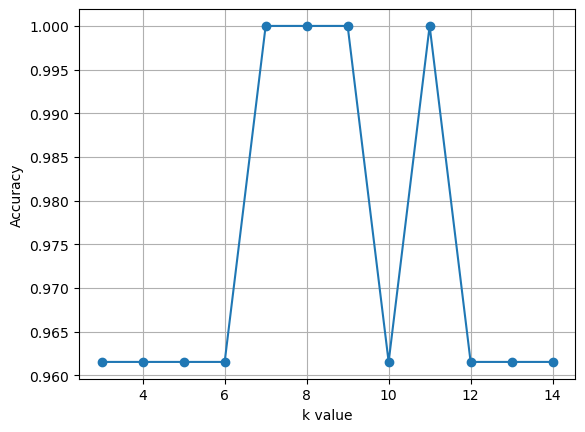

In [30]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [31]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [32]:
# Evaluation of model

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('Accuracy :', accuracy_score(y_test,y_pred_knn))
print('Precision :', precision_score(y_test,y_pred_knn,average = 'micro'))
print('Recall :', recall_score(y_test,y_pred_knn,average = 'micro'))
print('F1 Score :', f1_score(y_test,y_pred_knn,average =  'micro'))

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 1.0


In [33]:
confusion_matrix(y_test,y_pred_knn)

array([[8, 0, 0],
       [0, 9, 0],
       [0, 0, 9]], dtype=int64)

# Conclusion

From the above findings KNN model have good accuracy,precision,F1 score. So, knn models fits best for the given iris dataset